## CC.STD

In [6]:
from obspy import read

infolder = '../mseed/2017/CC/STD/BHE.D'

In [31]:
st = read(f'{infolder}/*200')
st.extend(read(f'{infolder}/*201'))
st.extend(read(f'{infolder}/*202'))
st.extend(read(f'{infolder}/*207'))
st.extend(read(f'{infolder}/*208'))
st.extend(read(f'{infolder}/*209'))




# st.extend(read(f'{infolder}/*19?'))

7 Trace(s) in Stream:
CC.STD..BHE | 2017-07-19T00:00:02.860000Z - 2017-07-20T00:00:01.740000Z | 50.0 Hz, 4319945 samples
CC.STD..BHE | 2017-07-20T00:00:01.760000Z - 2017-07-21T00:00:00.000000Z | 50.0 Hz, 4319913 samples
CC.STD..BHE | 2017-07-21T00:00:00.000000Z - 2017-07-21T16:40:42.980000Z | 50.0 Hz, 3002150 samples
CC.STD..BHE | 2017-07-26T18:53:38.615000Z - 2017-07-26T19:35:36.715000Z | 50.0 Hz, 125906 samples
CC.STD..BHE | 2017-07-26T19:40:13.615000Z - 2017-07-26T23:59:59.995000Z | 50.0 Hz, 779320 samples
CC.STD..BHE | 2017-07-27T00:00:00.015000Z - 2017-07-27T23:59:59.995000Z | 50.0 Hz, 4320000 samples
CC.STD..BHE | 2017-07-28T00:00:00.015000Z - 2017-07-28T23:59:59.995000Z | 50.0 Hz, 4320000 samples

In [28]:
st.filter('bandpass', freqmin=0.1, freqmax=5)

7 Trace(s) in Stream:
CC.STD..BHE | 2017-07-19T00:00:02.860000Z - 2017-07-20T00:00:01.740000Z | 50.0 Hz, 4319945 samples
CC.STD..BHE | 2017-07-20T00:00:01.760000Z - 2017-07-21T00:00:00.000000Z | 50.0 Hz, 4319913 samples
CC.STD..BHE | 2017-07-21T00:00:00.000000Z - 2017-07-21T16:40:42.980000Z | 50.0 Hz, 3002150 samples
CC.STD..BHE | 2017-07-26T18:53:38.615000Z - 2017-07-26T19:35:36.715000Z | 50.0 Hz, 125906 samples
CC.STD..BHE | 2017-07-26T19:40:13.615000Z - 2017-07-26T23:59:59.995000Z | 50.0 Hz, 779320 samples
CC.STD..BHE | 2017-07-27T00:00:00.015000Z - 2017-07-27T23:59:59.995000Z | 50.0 Hz, 4320000 samples
CC.STD..BHE | 2017-07-28T00:00:00.015000Z - 2017-07-28T23:59:59.995000Z | 50.0 Hz, 4320000 samples

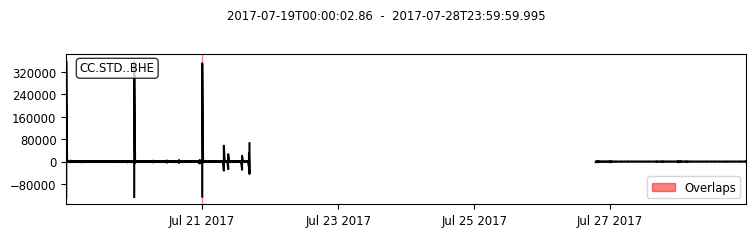

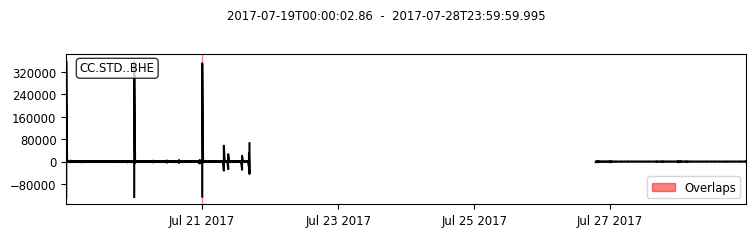

In [9]:
st.plot()

In [10]:
from obspy import read_inventory

inv = read_inventory('../inventory/CC.STD.xml')

In [11]:
st = st.remove_response(inventory=inv, output='VEL')

/home/pm/miniforge3/envs/seismic/lib/python3.10/site-packages/obspy/core/inventory/network.py:251: UserWarning: Found more than one matching response. Returning first.
  warnings.warn(msg)


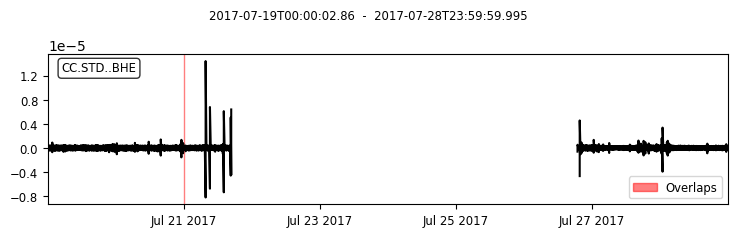

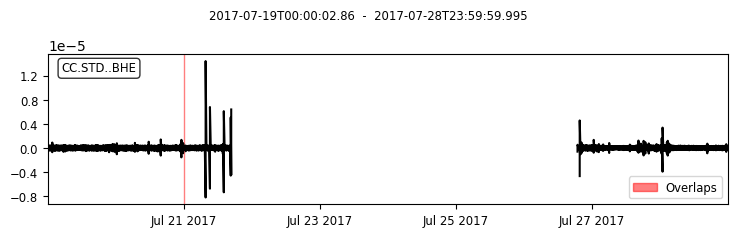

In [12]:
st.plot()

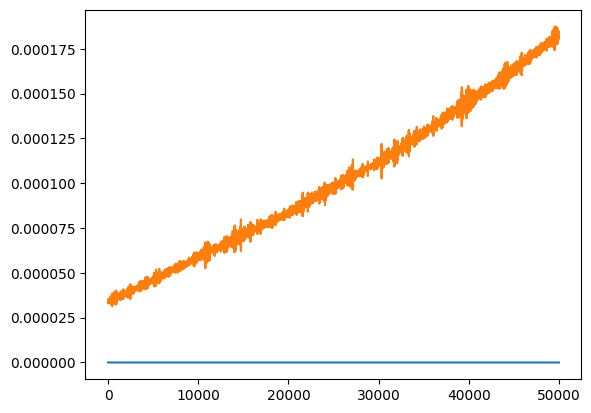

In [37]:
from matplotlib import pyplot as plt
st = st.sort()
plt.plot(st[0].remove_response(inventory=inv).data[50000:100000])
plt.plot(st[-1].remove_response(inventory=inv).data[50000:100000])

# plt.ylim((-1e-6, 1e-6))


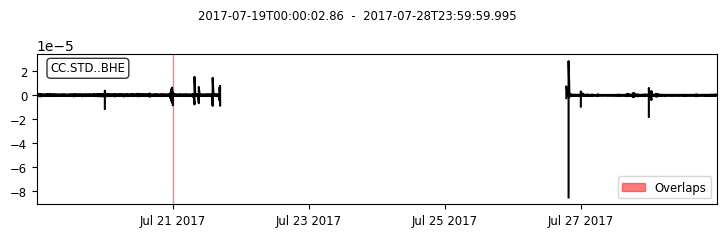

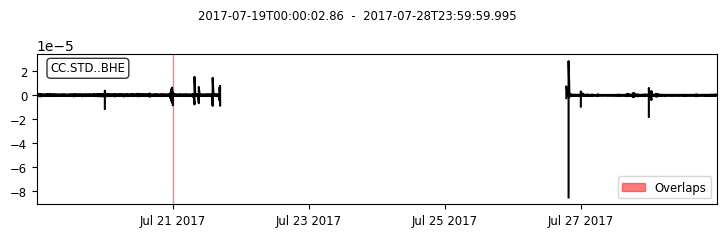

In [63]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

## UW.STD

In [1]:
from obspy import read

infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2008/UW/STD/EHZ.D'

In [2]:
st = read(f'{infolder}/*')


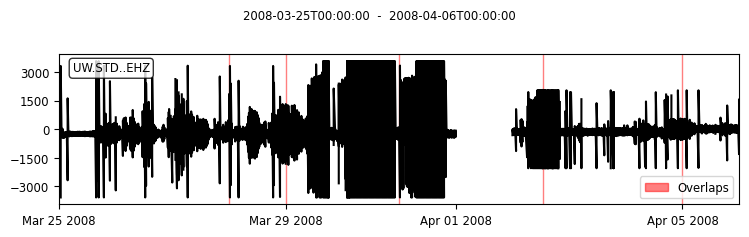

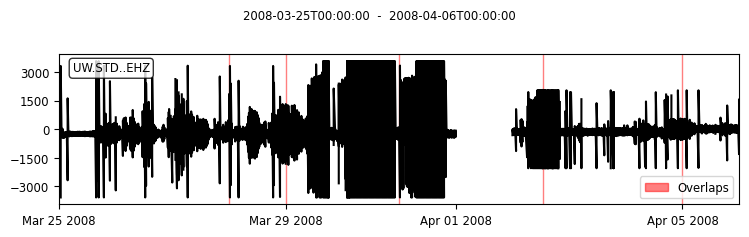

In [3]:
st.plot()

In [4]:
from obspy import read_inventory

inv = read_inventory('../inventory/UW.STD.xml')
inv = inv.select(channel='EHZ')

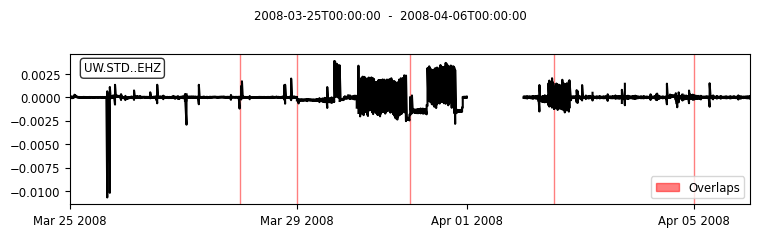

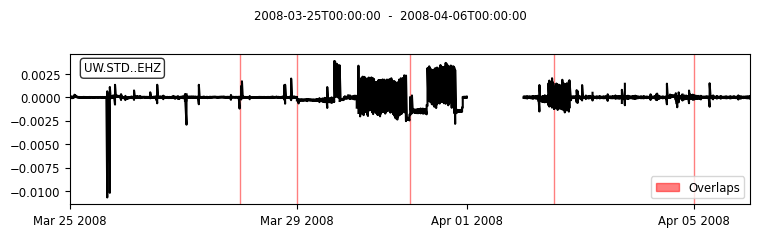

In [5]:
st.remove_response(inventory=inv, output='VEL')
st.plot()

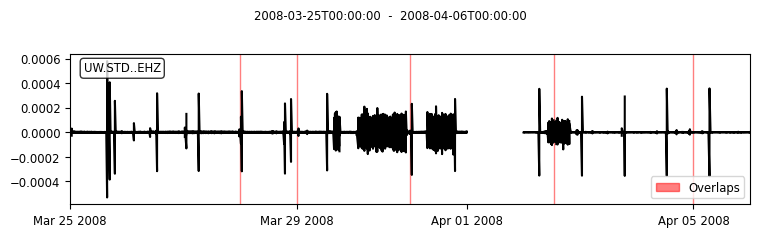

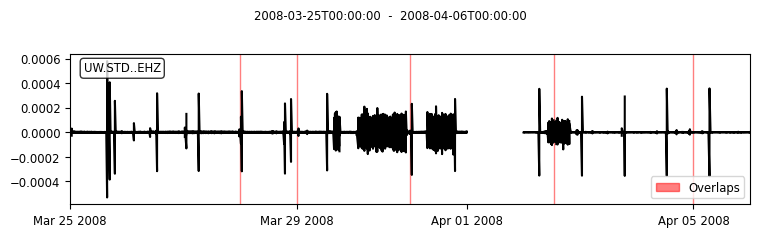

In [10]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

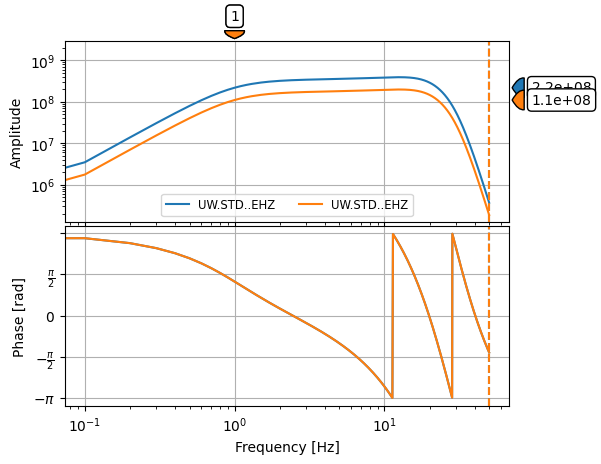

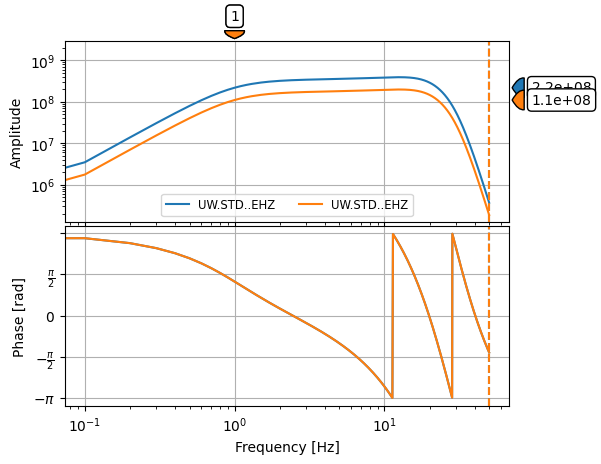

In [8]:
from obspy import UTCDateTime
inv2 = inv.select(starttime=UTCDateTime(2008, 3, 25), endtime=UTCDateTime(2008, 4, 10))
inv2.plot_response(.1)

## UW.EDM

In [66]:
from obspy import read


infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2013/UW/EDM/EHZ.D'

In [165]:
st = read(f'{infolder}/*24?')

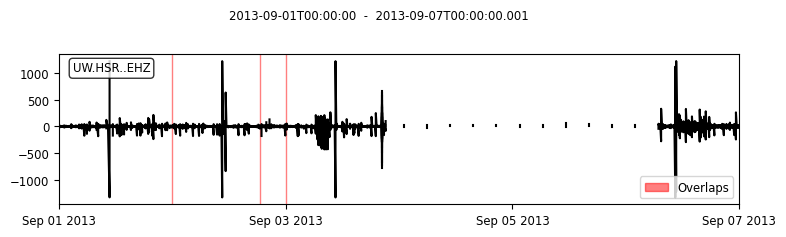

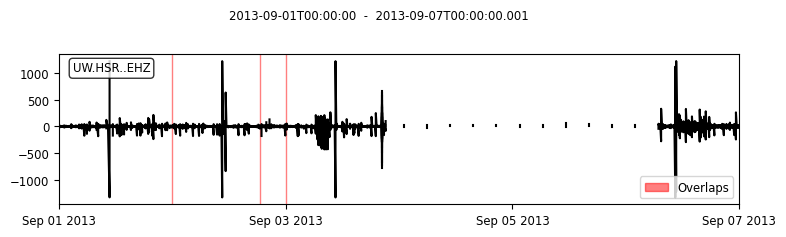

In [166]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()


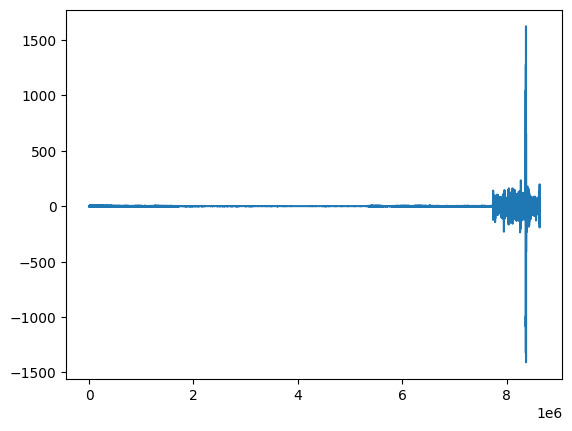

In [70]:
st = st.merge()
from matplotlib import pyplot as plt
plt.plot(st[0].data)

In [64]:
from obspy import read_inventory
inv = read_inventory('../inventory/UW.EDM.xml')

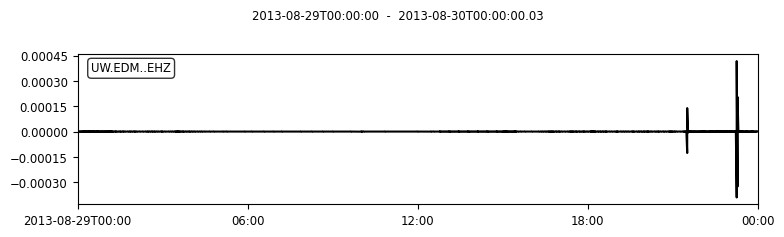

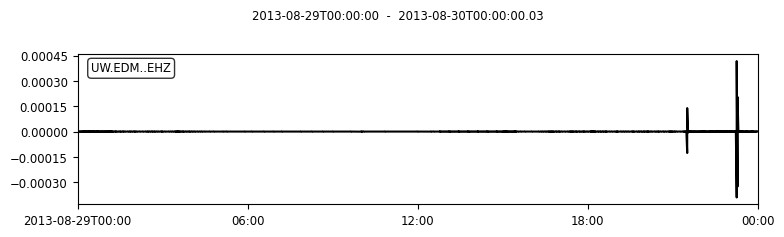

In [71]:
st = st.split()
st.remove_response(inventory=inv, output='VEL')
st.plot()

In [72]:
st = st.merge()

(-1e-05, 1e-05)

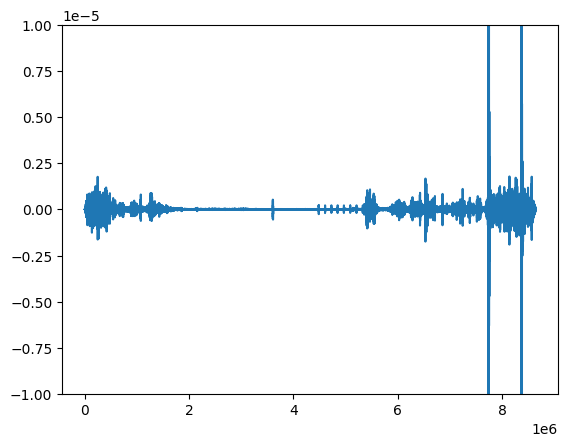

In [75]:
from matplotlib import pyplot as plt
plt.plot(st[0].data)
plt.ylim(-.00001, .00001)

# UW FL2

In [128]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2013/UW/FL2/EHZ.D'
st = read(f'{infolder}/*246')
st.extend(read(f'{infolder}/*247'))
st.extend(read(f'{infolder}/*248'))

st.extend(read(f'{infolder}/*249'))

183 Trace(s) in Stream:

UW.FL2..EHZ | 2013-09-03T00:00:00.001000Z - 2013-09-03T20:20:29.791000Z | 100.0 Hz, 7322980 samples
...
(181 other traces)
...
UW.FL2..EHZ | 2013-09-06T23:45:20.011000Z - 2013-09-07T00:00:00.001000Z | 100.0 Hz, 88000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

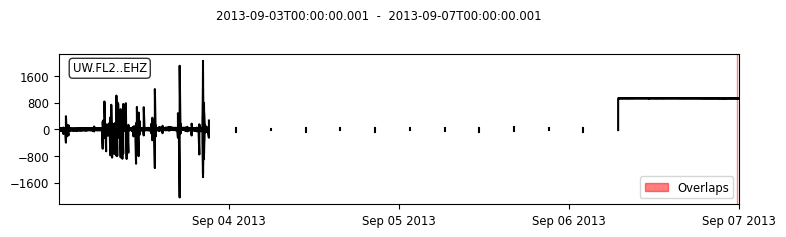

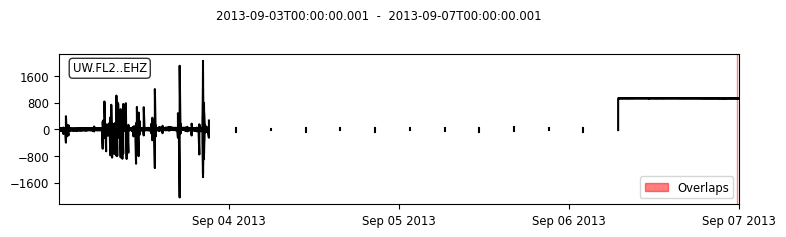

In [129]:
# st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

## UW.JUN

In [38]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2013/UW/JUN/EHZ.D'
st = read(f'{infolder}/*24?')

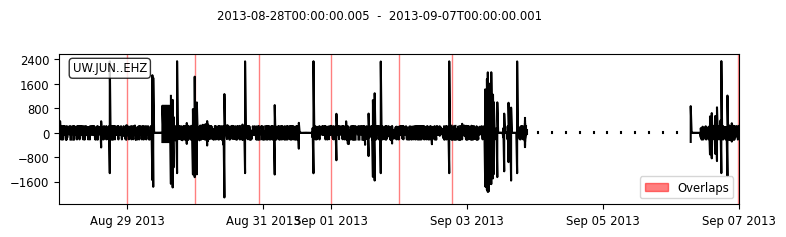

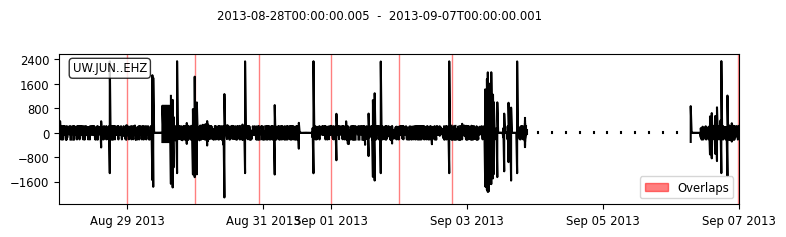

In [39]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

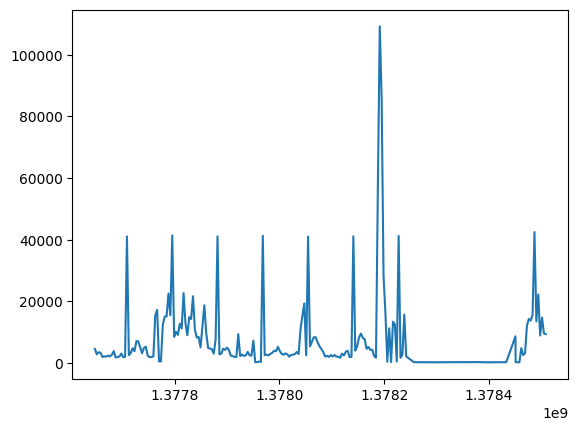

In [42]:
import numpy as np
# test whether the data is faulty using an hourly RMS criterion
st = st.sort()

rms = []
starttimes = []

for win in st.slide(window_length=3600, step=3600):
    win = win.merge()
    rms.append(np.sum(win[0].data**2)**.5)
    starttimes.append(win[0].stats.starttime)
from matplotlib import pyplot as plt
plt.plot(starttimes, rms)


## UW.SHW

In [182]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2013/UW/SHW/EHZ.D/*'

st = read(f'{infolder}/*')

Exception: No file matching file pattern: /home/pm/Documents_sync/PhD/StHelens/mseed/2013/UW/SHW/EHZ.D/*/*

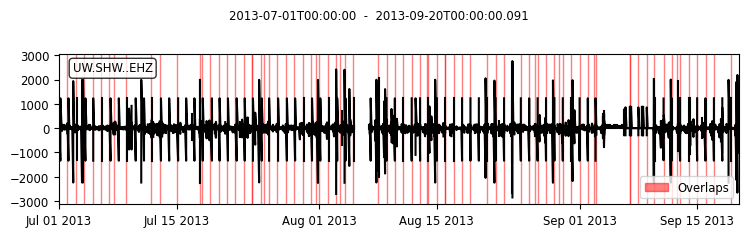

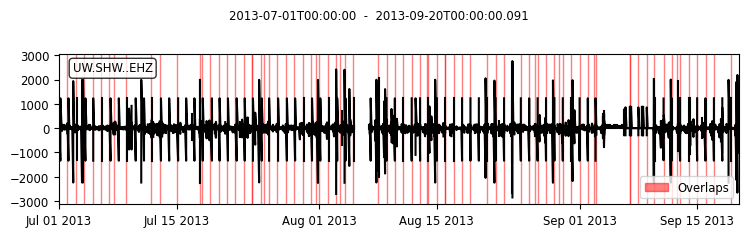

In [125]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

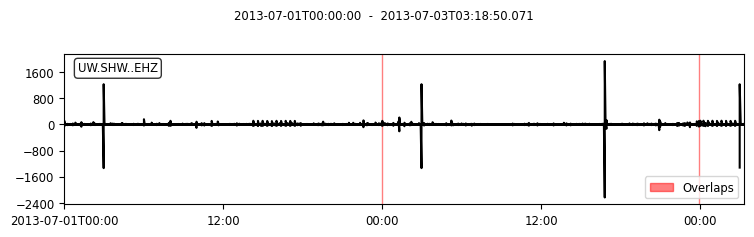

In [120]:
st[:25].plot()

In [127]:
from obspy import UTCDateTime
UTCDateTime(2013,9,1).julday

244

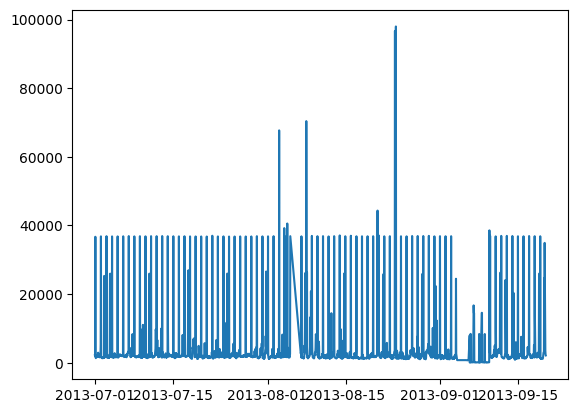

In [126]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

# test whether the data is faulty using an hourly RMS criterion
st = st.sort()

rms = []
starttimes = []

for win in st.slide(window_length=86400, step=86400):
    win = win.merge()
    rms.append(np.sum(win[0].data**2)**.5)
    starttimes.append(win[0].stats.starttime.datetime)
plt.plot(starttimes, rms)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()


In [ ]:
plt.plot(starttimes, rms)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

## PB.B203

In [20]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2018/PB/B203/EHZ.D'

st = read(f'{infolder}/*3??')

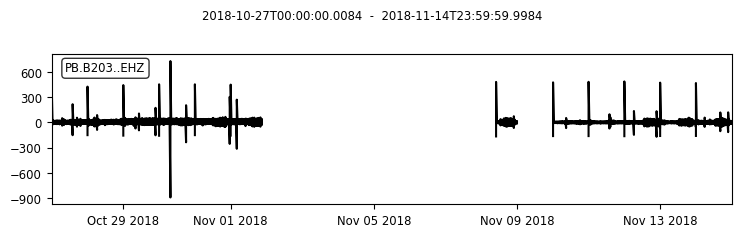

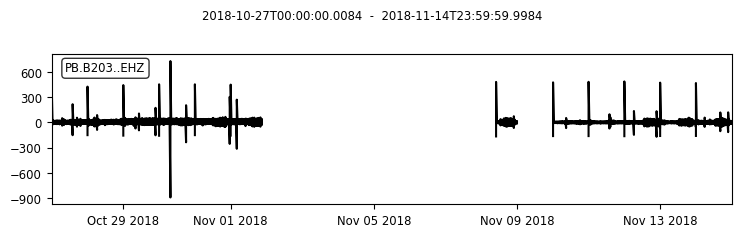

In [21]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

## UW.FL2 2018

In [13]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2018/UW/FL2/EHZ.D'
st = read(f'{infolder}/*316')

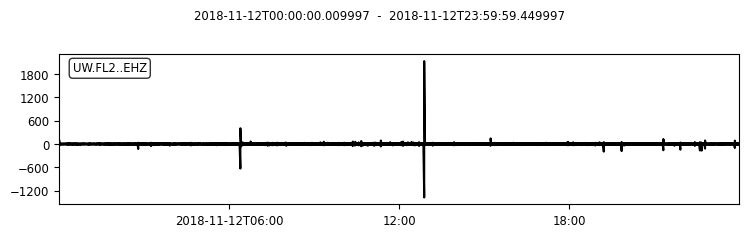

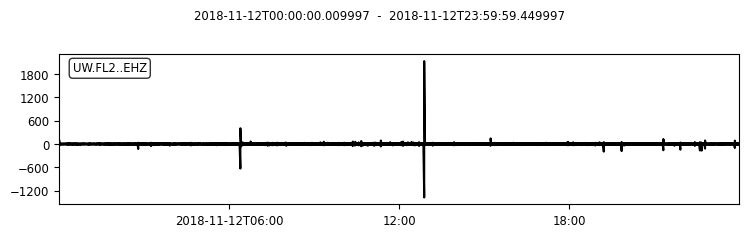

In [14]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

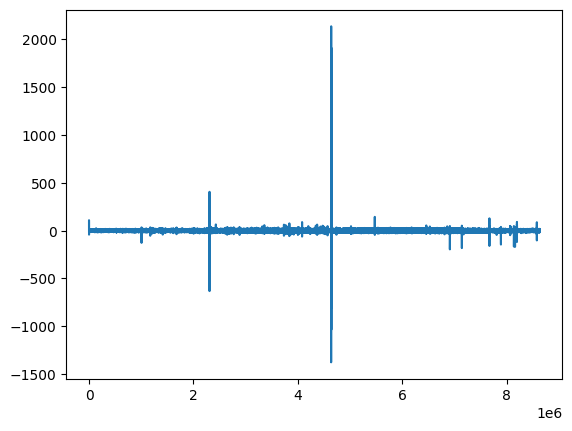

In [15]:
from matplotlib import pyplot as plt
st.merge()
plt.plot(st[0].data)

## UW.SHW 2018

In [208]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2018/UW/SHW/EHZ.D'
st = read(f'{infolder}/*')

In [209]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

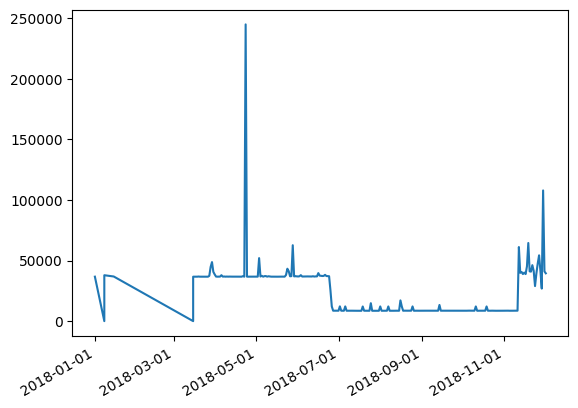

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mdates

# test whether the data is faulty using an hourly RMS criterion
st = st.sort()

rms = []
starttimes = []

for win in st.slide(window_length=86400, step=86400):
    win = win.merge()
    rms.append(np.sum(win[0].data**2)**.5)
    starttimes.append(win[0].stats.starttime.datetime)
plt.plot(starttimes, rms)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()

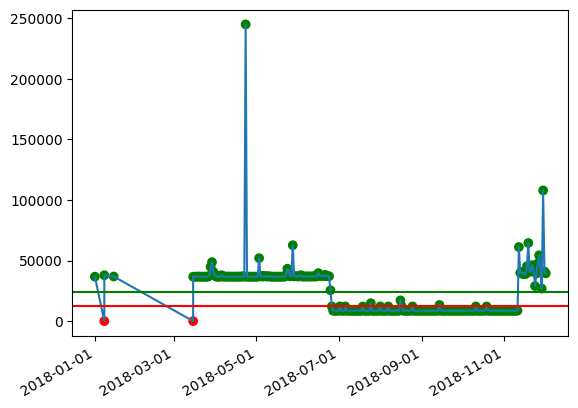

In [207]:
plt.plot(starttimes, rms)
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
# mark median and mean of the data
plt.axhline(np.median(rms), color='r')
plt.axhline(np.mean(rms), color='g')

colour = ['g' if x else 'r' for x in  np.array(rms) > .65*np.median(rms)]
# change colour of the curve, where it's less than 50% of the median
plt.scatter(starttimes, rms, color=colour)

In [184]:
print(np.median(rms))
print(np.mean(rms))

8608.979052518163
18789.47801532138


In [3]:
# from matplotlib import pyplot as plt
# st.merge()
# plt.plot(st[0].data)
# plt.ylim((-200, 200))



In [4]:
# st.split()


In [58]:
from obspy import read_inventory
inv = read_inventory('../inventory/UW.SHW.xml')
# st.remove_response(inventory=inv, output='VEL')

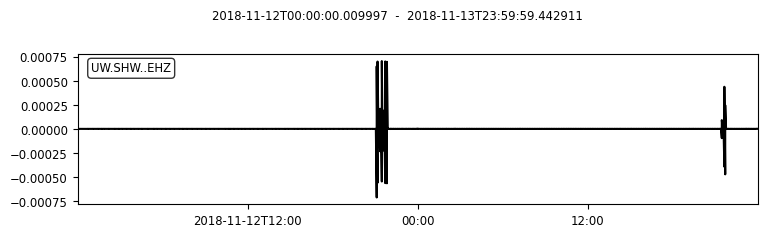

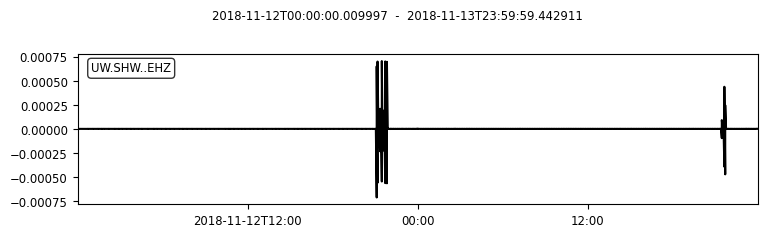

In [6]:
st.plot()

(-1e-06, 1e-06)

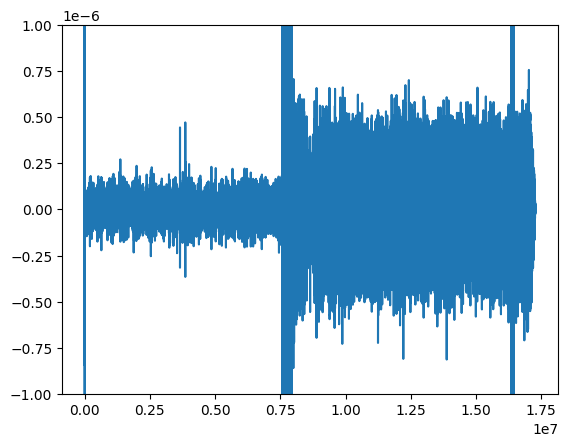

In [10]:
from matplotlib import pyplot as plt
# st.merge()
plt.plot(st[0].data)
plt.ylim((-0.000001, 0.000001))

## UW.JUN 2018

In [60]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2018/UW/JUN/EHZ.D'
st = read(f'{infolder}/*')

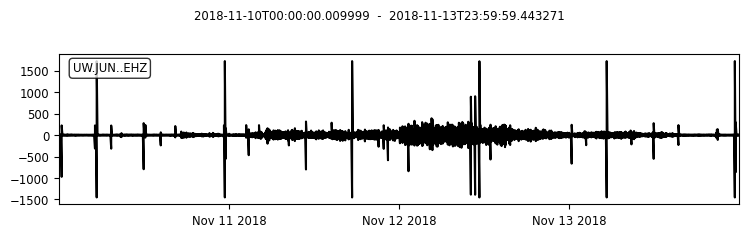

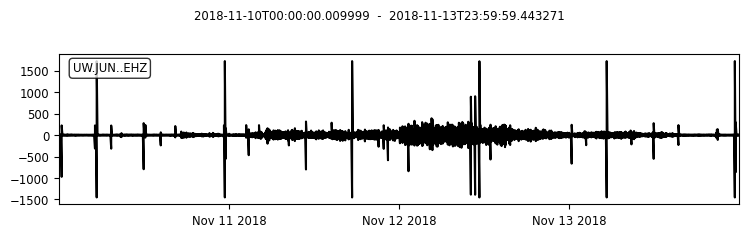

In [61]:
st.filter('bandpass', freqmin=0.05, freqmax=5)
st.plot()

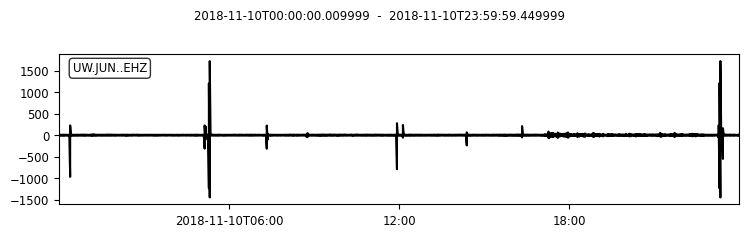

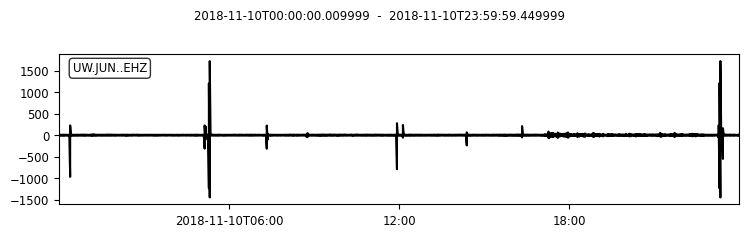

In [70]:
st[:1][:4].plot()

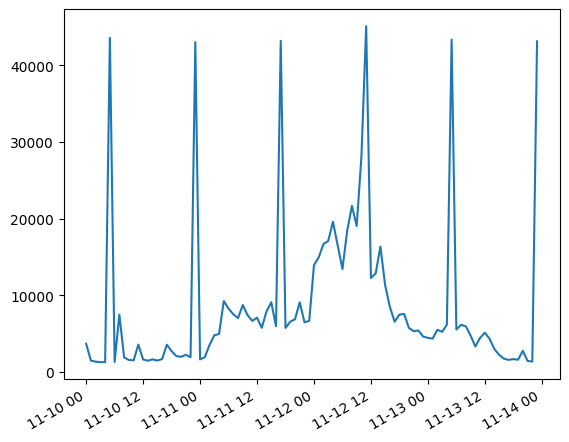

In [78]:
import numpy as np
from matplotlib import dates as mdates
# test whether the data is faulty using an hourly RMS criterion
st = st.sort()

rms = []
starttimes = []

for win in st.slide(window_length=3600, step=3600):
    win = win.merge()
    rms.append(np.sum(win[0].data**2)**.5)
    starttimes.append(win[0].stats.starttime.datetime)
from matplotlib import pyplot as plt
plt.plot(starttimes, rms)
ax = plt.gca()
# set locator and formatter
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax.xaxis.set_major_formatter(mdates.AutoDateFormatter())
# rota tick labels
plt.setp(ax.get_xticklabels(), rotation=30, ha='right');

(-400.0, 400.0)

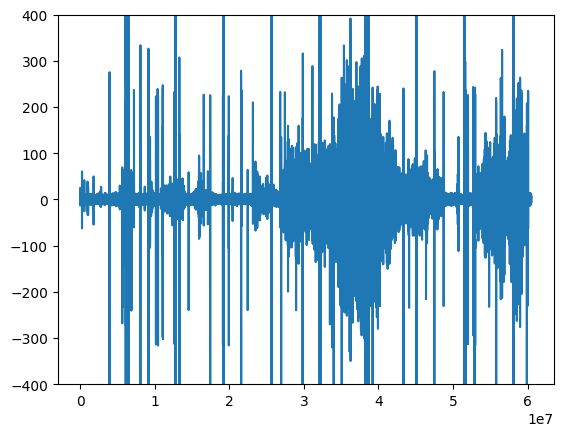

In [21]:
from matplotlib import pyplot as plt
st.merge()
plt.plot(st[0].data)
plt.ylim((-400, 400))

# MUSTANG values

## UW.EDM

In [8]:
import pandas as pd

# load xml file into pandas Dataframe

df = pd.read_xml('../mustang/UW_EDM_max_range.xml')


df['start'] = pd.to_datetime(df['start'])

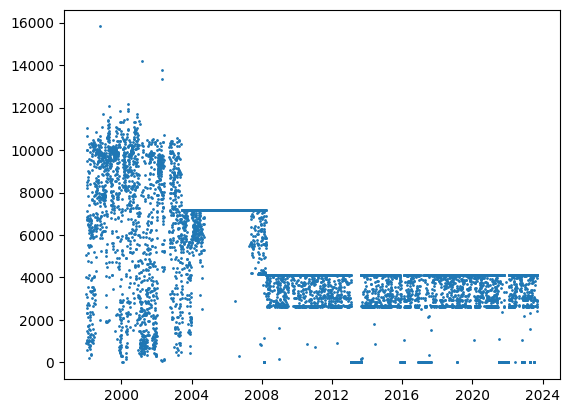

In [11]:
from matplotlib import pyplot as plt

plt.scatter(df['start'], df['value'], s=1)

In [60]:
# find values that occur the most
df['value'].value_counts()[:10]

4095.0    2367
7166.0    1324
8.0        159
7.0         88
6.0         76
9.0         61
12.0        57
5.0         56
2654.0      45
4.0         40
2652.0      40
2662.0      35
2657.0      34
2655.0      33
2656.0      33
11.0        31
2651.0      30
2658.0      29
2645.0      29
2649.0      28
2660.0      28
2659.0      27
2664.0      27
2661.0      27
2646.0      25
2647.0      23
2639.0      23
2663.0      23
2666.0      23
2653.0      23
2643.0      23
2648.0      23
2650.0      22
2644.0      21
13.0        19
2669.0      18
2642.0      18
2665.0      18
10.0        18
Name: value, dtype: int64

In [106]:
bad = df['start'][df['value']<200]
bad2 = df['start'][df['value']==2654]
print(len(bad))

642


In [114]:
print(bad.sort_values())


1392    2000-01-14T00:00:00
1410    2000-01-29T00:00:00
8659    2008-02-11T00:00:00
7988    2008-02-12T00:00:00
8033    2008-02-15T00:00:00
               ...         
465     2023-07-08T00:00:00
464     2023-07-09T00:00:00
463     2023-07-10T00:00:00
462     2023-07-11T00:00:00
461     2023-07-12T00:00:00
Name: start, Length: 642, dtype: object
<class 'str'>


In [127]:
# find value in dataframe

print(df[df['start']=='2013-09-05T00:00:00'])

      value net  sta  loc  cha qual         target                start  \
4478  142.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2013-09-05T00:00:00   

                      end               lddate  
4478  2013-09-05T23:59:59  2021-06-26T07:19:21  


In [101]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client('IRIS')

bulk = [('UW', 'EDM', '*', 'EHZ', UTCDateTime(bst), UTCDateTime(bst)+3600) for bst in bad]
st = client.get_waveforms_bulk(bulk[:100:])

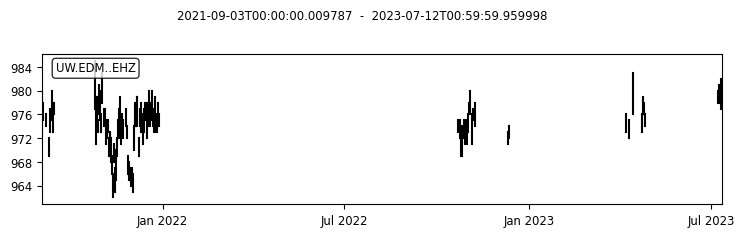

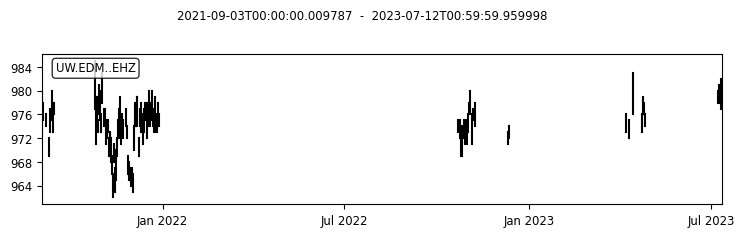

In [102]:
st.plot()

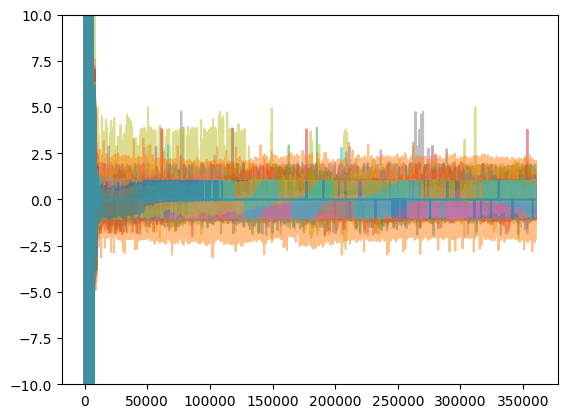

In [96]:
st.filter('highpass', freq=0.05)
for tr in st:
    plt.plot(tr.data, alpha=0.5)
    plt.ylim((-10, 10))

In [83]:
import requests

r = requests.get(
    'https://services.iris.edu/mustang/measurements/1/query?metric=max_range&net=UW&sta=EDM&cha=EHZ&output=xml&timewindow=1998-01-01T00:00:00,2023-09-07T00:00:00&nodata=404',
    allow_redirects=True)
# open('test.xml', 'wb').write(r.content)

In [84]:
print(r.content)
import pandas as pd
df = pd.read_xml(r.content)

b'<?xml version="1.0" encoding="UTF-8"?><measurements><max_range value="2639.00" net="UW" sta="EDM" loc="" cha="EHZ" qual="M" target="UW.EDM..EHZ.M" start="2023-09-06T00:00:00" end="2023-09-06T23:59:59" lddate="2023-09-08T03:38:03"/><max_range value="2424.00" net="UW" sta="EDM" loc="" cha="EHZ" qual="M" target="UW.EDM..EHZ.M" start="2023-09-05T00:00:00" end="2023-09-05T23:59:59" lddate="2023-09-07T03:37:11"/><max_range value="2915.00" net="UW" sta="EDM" loc="" cha="EHZ" qual="M" target="UW.EDM..EHZ.M" start="2023-09-04T00:00:00" end="2023-09-04T23:59:59" lddate="2023-09-06T03:36:06"/><max_range value="2618.00" net="UW" sta="EDM" loc="" cha="EHZ" qual="M" target="UW.EDM..EHZ.M" start="2023-09-03T00:00:00" end="2023-09-03T23:59:59" lddate="2023-09-05T03:36:20"/><max_range value="4095.00" net="UW" sta="EDM" loc="" cha="EHZ" qual="M" target="UW.EDM..EHZ.M" start="2023-09-02T00:00:00" end="2023-09-02T23:59:59" lddate="2023-09-04T03:37:50"/><max_range value="4095.00" net="UW" sta="EDM" loc="

In [85]:
print(df)

       value net  sta  loc  cha qual         target                start  \
0     2639.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2023-09-06T00:00:00   
1     2424.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2023-09-05T00:00:00   
2     2915.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2023-09-04T00:00:00   
3     2618.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2023-09-03T00:00:00   
4     4095.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2023-09-02T00:00:00   
...      ...  ..  ...  ...  ...  ...            ...                  ...   
9172  4807.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2004-07-05T00:00:00   
9173  7166.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2004-03-09T00:00:00   
9174  7166.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2004-05-24T00:00:00   
9175  5668.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2004-05-22T00:00:00   
9176  6104.0  UW  EDM  NaN  EHZ    M  UW.EDM..EHZ.M  2004-08-11T00:00:00   

                      end               lddate  
0     2023-09-06T23:59:59  2023-09-08T

# UW.EDM check periodic noise

In [76]:
from obspy import read
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2009/UW/EDM/EHZ.D'

st = read(f'{infolder}/*')
st.filter('highpass', freq=0.05)

20 Trace(s) in Stream:
UW.EDM..EHZ | 2009-01-01T00:00:00.000600Z - 2009-01-01T00:00:20.910600Z | 100.0 Hz, 2092 samples
UW.EDM..EHZ | 2009-01-01T02:07:18.519900Z - 2009-01-01T02:07:19.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T04:25:19.519900Z - 2009-01-01T04:25:20.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T06:43:20.519900Z - 2009-01-01T06:43:21.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T09:01:21.519900Z - 2009-01-01T09:01:22.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T11:19:22.519900Z - 2009-01-01T11:19:23.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T13:37:23.519900Z - 2009-01-01T13:37:24.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T15:55:24.519900Z - 2009-01-01T15:55:25.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T18:13:25.519900Z - 2009-01-01T18:13:26.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 2009-01-01T20:31:26.519900Z - 2009-01-01T20:31:27.509900Z | 100.0 Hz, 100 samples
UW.EDM..EHZ | 20

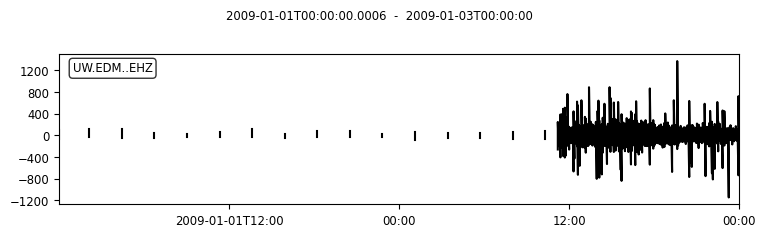

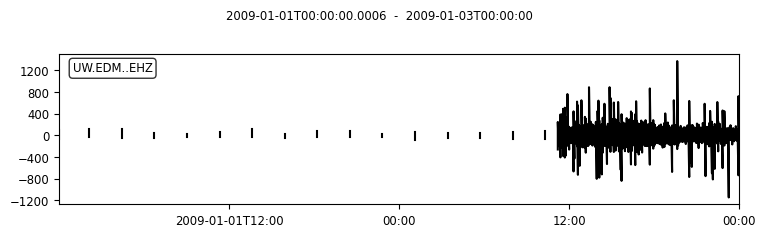

In [77]:
st.plot()

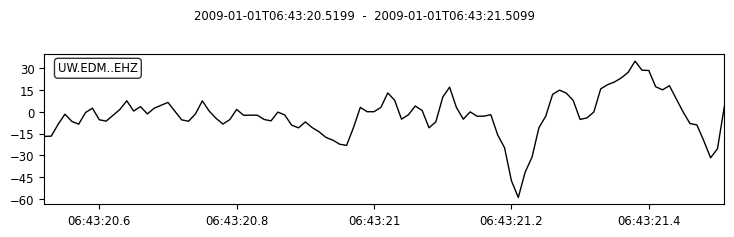

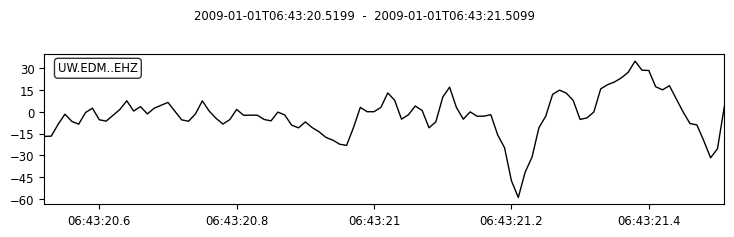

In [78]:
st[3].plot()
# st[1].plot()

In [79]:
# st[18].plot()
from matplotlib import pyplot as plt

plt.plot(st[0].data[:10000])

2.970748099866934
0.0
-2.970748099866934


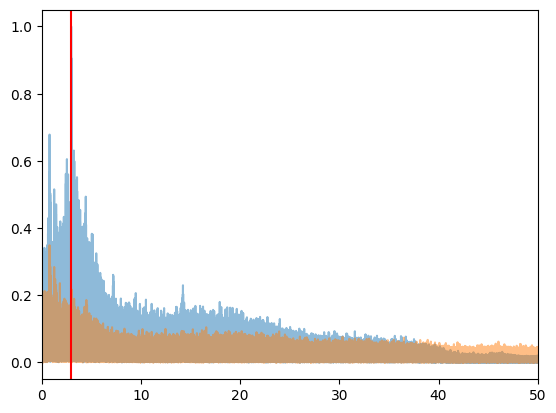

In [80]:
import numpy as np
data = st[-1].data

dataft = np.fft.fft(data)
dataft1b = np.fft.fft(np.sign(data))

freq = np.fft.fftfreq(len(dataft), st[0].stats.delta)

plt.plot(freq, np.abs(dataft)/np.abs(dataft).max(), alpha=0.5)
plt.plot(freq, np.abs(dataft1b)/np.abs(dataft1b).max(), alpha=0.5)

plt.xlim((0, 50))

# mark maximum
plt.axvline(freq[np.abs(dataft).argmax()], color='r')
print(freq[np.abs(dataft).argmax()])
print(freq[np.abs(dataft1b).argmax()])

# second maximum
plt.axvline(freq[np.argsort(np.abs(dataft))[-2]], color='g')
print(freq[np.argsort(np.abs(dataft))[-2]])

# compare this to a normal signal

In [1]:
from obspy.signal.invsim import cosine_taper

ct = cosine_taper(100)

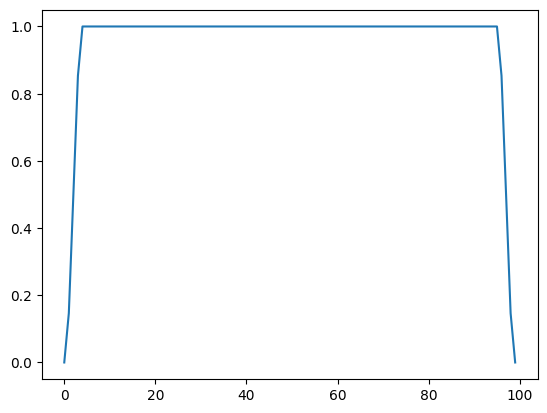

In [2]:
from matplotlib import pyplot as plt
plt.plot(ct)

In [81]:
infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2020/UW/EDM/EHZ.D'
st2 = read(f'{infolder}/*')
st2.filter('highpass', freq=0.05)


2 Trace(s) in Stream:
UW.EDM..EHZ | 2020-01-01T00:00:00.000002Z - 2020-01-01T23:59:59.450002Z | 100.0 Hz, 8639946 samples
UW.EDM..EHZ | 2020-01-02T00:00:00.000078Z - 2020-01-02T23:59:59.470078Z | 100.0 Hz, 8639948 samples

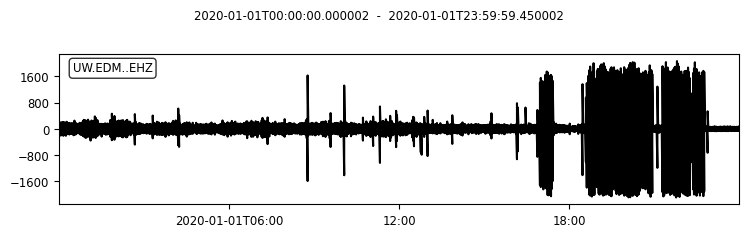

In [83]:
st2[0].plot()

3.4031462696641848


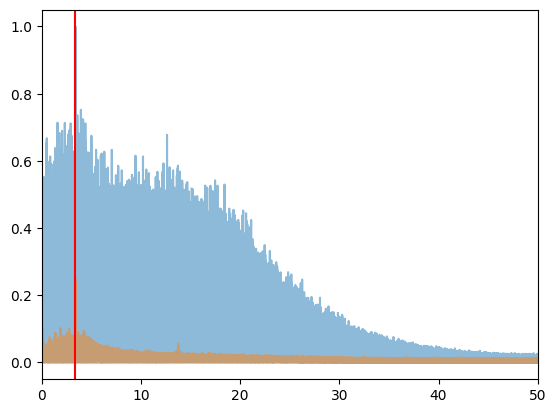

In [86]:
st2_ft = np.fft.fft(st2[0].data)
st2_ft1b = np.fft.fft(np.sign(st2[0].data))
freq = np.fft.fftfreq(len(st2_ft), st2[0].stats.delta)

plt.plot(freq, np.abs(st2_ft)/np.abs(st2_ft).max(), alpha=0.5)
plt.plot(freq, np.abs(st2_ft1b)/np.abs(st2_ft1b).max(), alpha=0.5)

plt.xlim((0, 50))

# mark maximum
plt.axvline(freq[np.abs(st2_ft).argmax()], color='r')
print(freq[np.abs(st2_ft).argmax()])

# Time bias for data availability check

Let's use the example of CC.SEP

In [32]:
from obspy import read

infolder = '/home/pm/Documents_sync/PhD/StHelens/mseed/2008/CC/STD/BHZ.D'

st = read(f'{infolder}/*')
st.filter('highpass', freq=0.05)


106 Trace(s) in Stream:

CC.STD..BHZ | 2008-02-28T00:00:00.000000Z - 2008-02-29T00:00:00.000000Z | 50.0 Hz, 4320001 samples
...
(104 other traces)
...
CC.STD..BHZ | 2008-03-29T00:00:00.000000Z - 2008-03-30T00:00:00.000000Z | 50.0 Hz, 4320001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [33]:
st.print_gaps()

Source            Last Sample                 Next Sample                 Delta           Samples 
CC.STD..BHZ       2008-02-29T15:41:49.980000Z 2008-02-29T15:42:00.020000Z 10.020000       501     
CC.STD..BHZ       2008-03-01T04:07:56.980000Z 2008-03-01T04:49:27.000000Z 2490.000000     124500  
CC.STD..BHZ       2008-03-01T18:38:09.980000Z 2008-03-01T19:04:50.000000Z 1600.000000     80000   
CC.STD..BHZ       2008-03-02T00:00:00.000000Z 2008-03-02T00:00:00.000000Z -0.020000       -1      
CC.STD..BHZ       2008-03-02T05:55:21.980000Z 2008-03-02T05:55:42.020000Z 20.020000       1001    
CC.STD..BHZ       2008-03-03T06:45:31.980000Z 2008-03-03T06:45:42.020000Z 10.020000       501     
CC.STD..BHZ       2008-03-05T00:00:00.000000Z 2008-03-05T00:00:00.000000Z -0.020000       -1      
CC.STD..BHZ       2008-03-05T03:10:11.980000Z 2008-03-05T03:10:22.020000Z 10.020000       501     
CC.STD..BHZ       2008-03-05T04:36:11.980000Z 2008-03-05T04:41:22.020000Z 310.020000      15501   
CC.STD..BH